In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



Improve robustness to night domain:
 - Domain adaptation

 General improvements:
 - Re-Ranking / Post-Processing
 - undistortion
  - domain adaptation


---


 https://docs.google.com/document/d/1qkqQFlQ8z3Mj4Iy_Ckrih8R8PYBzaEPVJGrpmo49NLY/edit#


---


 git clone https://github.com/gmberton/CosPlace

---



---



In [ ]:
import os
import time
import shutil
!pip install faiss-gpu
!pip install faiss-cpu 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
start_time = time.time()
os.chdir('/content')
if  not os.path.isfile('/content/small/train/37.70/@0544204.32@4173406.33@10@S@037.70683@-122.49851@TYcjxIohRl--XFaR4OgdxA@@0@@@@201910@@.jpg'):
  print('data will be extracted in :' ,os.getcwd()) 
  !unzip -q '/content/drive/MyDrive/Class_Vis_Geo/datasets/sf-xs.zip'

  print('extraction has been completed in {} seconds'.format(time.time() - start_time  ))
else :
    print('sanf dataset is already available ')

sanf dataset is already available 


#  Undistortion

In [ ]:
test_database_path = '/content/small/test/database'
test_database = os.listdir(test_database_path)
test_database[0:2]

['@0547350.73@4182090.25@10@S@037.78494@-122.46225@asRwa8lJ_hUa4Ri_LX-xSQ@@146@@@@201311@@.jpg',
 '@0553548.11@4182920.43@10@S@037.79208@-122.39181@RF1aFMT_j36gVw8LHMPvOw@@199@@@@201311@@.jpg']

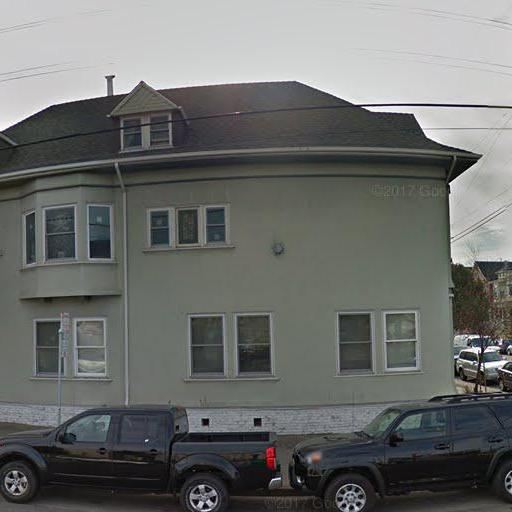

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:4227: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


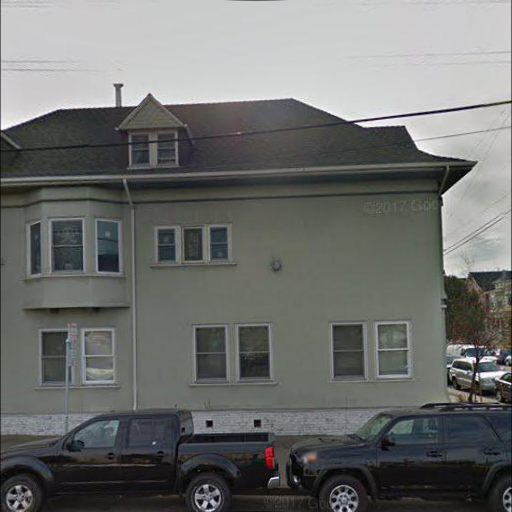

In [ ]:
os.chdir('/content/drive/MyDrive/Class_Vis_Geo')
import torch
import torchvision
from PIL import Image
import torch.nn.functional as F
from google.colab.patches import cv2_imshow
img_path = test_database_path +'/'+test_database[0]
# Open the distorted image with PIL
img = Image.open(img_path )
display(img)
# Convert PIL image to torch.tensor
tensor = torchvision.transforms.ToTensor()(img)
assert tensor.shape == torch.Size([3, 512, 512])
# The tensor has shape [3, 512, 512], we need to add a dimension at the beginning
tensor = tensor.reshape(1, 3, 512, 512)
# Some cool functions to undistort your image
undistortion_tensor = torch.load("grid.torch")
tensor = F.grid_sample(tensor, undistortion_tensor)

# Remove the extra dimension
tensor = tensor.reshape(3, 512, 512)
# Convert back to PIL image, so we can visualize it
img = torchvision.transforms.ToPILImage()(tensor)
display(img)

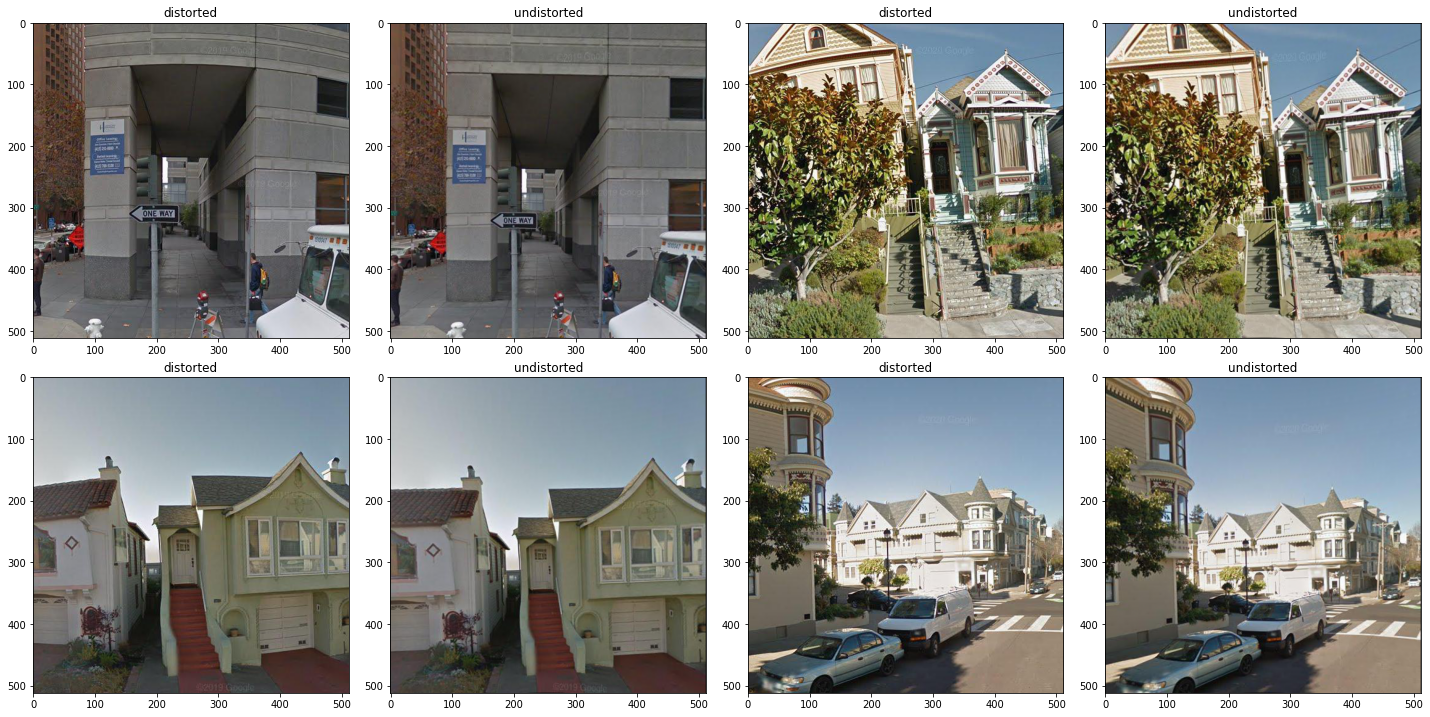

In [ ]:
from matplotlib import pyplot as plt
import torch
import torchvision
from PIL import Image
import torch.nn.functional as F
fig, axs = plt.subplots(2,4,figsize=(20,10))
plt.tight_layout()

for i in range(1,8,2):
  img_path = test_database_path +'/'+test_database[i]
  # Open the distorted image with PIL
  img = Image.open(img_path ) 
  plt.subplot(2,4, i)   
  plt.imshow(img) 
  plt.title('distorted')

  tensor = torchvision.transforms.ToTensor()(img)
  assert tensor.shape == torch.Size([3, 512, 512])
  # The tensor has shape [3, 512, 512], we need to add a dimension at the beginning
  tensor = tensor.reshape(1, 3, 512, 512)
  # Some cool functions to undistort your image
  undistortion_tensor = torch.load("grid.torch")
  tensor = F.grid_sample(tensor, undistortion_tensor)

  # Remove the extra dimension
  tensor = tensor.reshape(3, 512, 512)
  # Convert back to PIL image, so we can visualize it
  img = torchvision.transforms.ToPILImage()(tensor)
  plt.subplot(2,4, i+1)
  plt.imshow(img) 
  plt.title('undistorted')


plt.savefig('/content/drive/MyDrive/Class_Vis_Geo/CosPlace_und/logs/undistortion.jpg')


In [ ]:
os.chdir('/content/drive/MyDrive/Class_Vis_Geo/CosPlace_und')
#  in training defalut backbone (resnet 18 was used)
# in training  fc_output_dim =512
! python3 eval.py --dataset_folder  /content/small --backbone resnet18 \
--save_dir  undistortion\
--fc_output_dim 512 --resume_model /content/drive/MyDrive/Class_Vis_Geo/CosPlace/logs/cos_place_epoch10/2023-01-12_11-37-00/best_model.pth


2023-01-14 08:26:01   eval.py --dataset_folder /content/small --backbone resnet18 --save_dir undistortion --fc_output_dim 512 --resume_model /content/drive/MyDrive/Class_Vis_Geo/CosPlace/logs/cos_place_epoch10/2023-01-12_11-37-00/best_model.pth
2023-01-14 08:26:01   Arguments: Namespace(L=2, M=10, N=5, alpha=30, augmentation_device='cuda', backbone='resnet18', batch_size=32, brightness=0.7, classifiers_lr=0.01, contrast=0.7, dataset_folder='/content/small', device='cuda', epochs_num=50, fc_output_dim=512, groups_num=8, hue=0.5, infer_batch_size=16, iterations_per_epoch=10000, lr=1e-05, min_images_per_class=10, num_workers=8, positive_dist_threshold=25, random_resized_crop=0.5, resume_model='/content/drive/MyDrive/Class_Vis_Geo/CosPlace/logs/cos_place_epoch10/2023-01-12_11-37-00/best_model.pth', resume_train=None, saturation=0.7, save_dir='undistortion', seed=0, test_set_folder='/content/small/test', use_amp16=False)
2023-01-14 08:26:01   The outputs are being saved in logs/undistortion